In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [10]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/Sensi analysis/Final model New car sensi-table.csv', skiprows=6 ) 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000030 entries, 0 to 3000029
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                       

In [12]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [13]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [14]:
list(df1.columns)

['run number',
 'new-car-treshold',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [15]:
df1.head(5)

,run number,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,3,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,1,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,4,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,3,0.3,True,True,20,10,1,0,0,0,...,9.997,599,490,0,0,0,0,0,0,0.0
4,3,0.3,True,True,20,10,2,0,1,0,...,9.994,599,490,0,0,0,0,1,0,0.0


In [20]:
df2 = df1.loc[df1['new-car-treshold'] == 0.3 ]
df2.head(5)

,run number,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,3,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,1,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,4,0.3,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,3,0.3,True,True,20,10,1,0,0,0,...,9.997,599,490,0,0,0,0,0,0,0.0
4,3,0.3,True,True,20,10,2,0,1,0,...,9.994,599,490,0,0,0,0,1,0,0.0


In [21]:
df3 = df1.loc[df1['new-car-treshold'] == 0.5 ]
df3.head(5)

,run number,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
809753,11,0.5,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
809757,11,0.5,True,True,20,10,1,0,0,0,...,9.997,599,490,0,0,0,0,0,0,0.0
809761,11,0.5,True,True,20,10,2,0,0,0,...,9.994,598,491,0,0,0,0,0,0,0.0
809764,11,0.5,True,True,20,10,3,0,0,0,...,9.993,597,492,0,0,0,0,0,0,0.0
809767,11,0.5,True,True,20,10,4,0,0,0,...,9.994,597,492,0,0,0,0,0,0,0.0


In [23]:
df4 = df1.loc[df1['new-car-treshold'] == 0.8 ]
df4.head(5)

,run number,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
1947240,21,0.8,True,True,20,10,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1947246,21,0.8,True,True,20,10,1,0,0,0,...,9.997,599,490,0,0,0,0,0,0,0.0
1947249,21,0.8,True,True,20,10,2,0,0,0,...,9.994,598,491,0,0,0,0,0,0,0.0
1947254,21,0.8,True,True,20,10,3,0,1,0,...,9.991,598,491,0,0,0,0,1,0,0.0
1947258,21,0.8,True,True,20,10,4,0,1,0,...,9.994,598,491,0,0,0,0,1,0,0.0


In [36]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

81.360209201884
44.23059563549653


In [24]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

78.76524677154282
39.5506599496092


In [25]:
df4_mean = df4['market-price'].mean()
print(df4_mean)
df4_std = df4['market-price'].std()
print(df4_std)

88.77001648585359
37.35703761583457


Text(0, 0.5, 'Combined company profits')

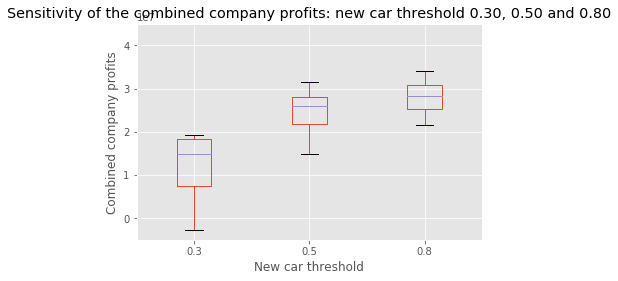

In [32]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['new-car-treshold'])
plt.ylim(- 5000000, 45000000 )
plot.get_figure().gca().set_title("Sensitivity of the combined company profits: new car threshold 0.30, 0.50 and 0.80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("New car threshold")
plot.get_figure().gca().set_ylabel("Combined company profits")

Text(0, 0.5, 'Total satisfied users')

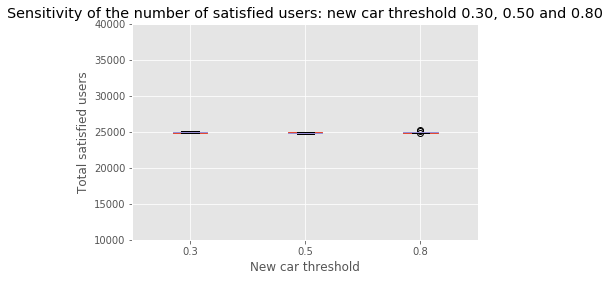

In [34]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['new-car-treshold'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of satisfied users: new car threshold 0.30, 0.50 and 0.80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("New car threshold")
plot.get_figure().gca().set_ylabel("Total satisfied users")

Text(0, 0.5, 'Total unsatisfied users')

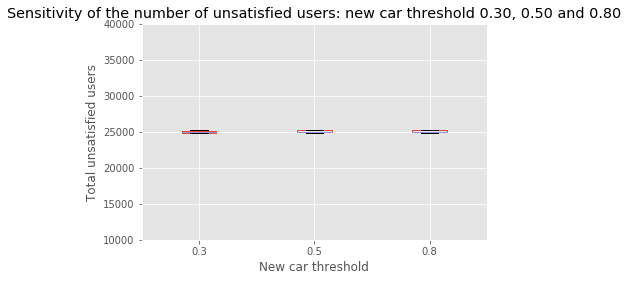

In [35]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['new-car-treshold'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of unsatisfied users: new car threshold 0.30, 0.50 and 0.80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("New car threshold")
plot.get_figure().gca().set_ylabel("Total unsatisfied users")

Text(0, 0.5, 'Number of times no parking was found')

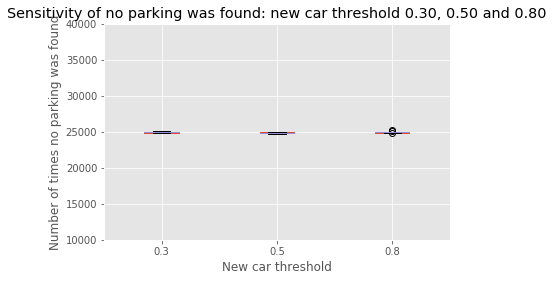

In [36]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['new-car-treshold'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of no parking was found: new car threshold 0.30, 0.50 and 0.80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("New car threshold")
plot.get_figure().gca().set_ylabel("Number of times no parking was found")